In [1]:
%matplotlib inline
import cv2
import collections
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.spatial import distance
import wolframalpha
# k-means
from sklearn.cluster import KMeans

# keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno

In [44]:
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def image_bin(image_gs):
    ret,image_bin = cv2.threshold(image_gs, 130, 255, cv2.THRESH_BINARY)
    return image_bin
def image_bin_adaptive(image_gs):
    image_bin = cv2.adaptiveThreshold(image_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
    return image_bin
def invert(image):
    return 255-image
def display_image(image, color= False):
    if color:
        plt.imshow(image)
    else:
        plt.imshow(image, 'gray')
def dilate(image):
    kernel = np.ones((6,6)) # strukturni element 3x3 blok
    return cv2.dilate(image, kernel, iterations=1)
def erode(image):
    kernel = np.ones((6,6)) # strukturni element 3x3 blok
    return cv2.erode(image, kernel, iterations=1)

#Funkcionalnost implementirana u V2
def resize_region(region):
    resized = cv2.resize(region,(28,28), interpolation = cv2.INTER_NEAREST)
    return resized
def scale_to_range(image):
    return image / 255
def matrix_to_vector(image):
    return image.flatten()
def prepare_for_ann(regions):
    ready_for_ann = []
    for region in regions:
        ready_for_ann.append(matrix_to_vector(scale_to_range(region)))
    return ready_for_ann
def convert_output(outputs):
    return np.eye(len(outputs))
def winner(output):
    return max(enumerate(output), key=lambda x: x[1])[0]

def sredi_izlaz(outputs):
    izlaz = np.zeros((100,10))
    for i in range(0,10):
        izlaz[i][0] = 1
    for i in range(10,20):
        izlaz[i][1] = 1  
    for i in range(20,30):
        izlaz[i][2] = 1
    for i in range(30,40):
        izlaz[i][3] = 1
    for i in range(40, 50):
        izlaz[i][4] = 1
    for i in range(50, 60):
        izlaz[i][5] = 1
    for i in range(60, 70):
        izlaz[i][6] = 1
    for i in range(70, 80):
        izlaz[i][7] = 1
    for i in range(80, 90):
        izlaz[i][8] = 1    
    for i in range(90, 100):
        izlaz[i][9] = 1
    return izlaz

In [3]:
def konture(image_orig, image_bin):
    
    contours, hierarchy = cv2.findContours(image_bin.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
     
    sorted_regions = []
    regions_dic = {}
    i = 0
    
    for contour in contours:
        if(hierarchy[0][i][3]==0):
            x,y,w,h = cv2.boundingRect(contour)
            region = image_bin[y:y+h+1,x:x+w+1]
            regions_dic[x] = resize_region(region)       
            cv2.rectangle(image_orig,(x,y),(x+w,y+h),(0,255,0),2)
        i=i+1
    
    sorted_regions_dic = collections.OrderedDict(sorted(regions_dic.items()))
    sorted_regions = sorted_regions_dic.values()
    # sortirati sve regione po x osi (sa leva na desno) i smestiti u promenljivu sorted_regions
    return image_orig, sorted_regions   

In [5]:
def create_ann():
    
    ann = Sequential()
    ann.add(Dense(128, input_dim=784, activation='sigmoid'))
    ann.add(Dense(10, activation='sigmoid'))
    return ann

def train_ann(ann, X_train, y_train):
   
    X_train = np.array(X_train, np.float32) 
    y_train = np.array(y_train, np.float32) 
   
    sgd = SGD(lr=0.01, momentum=0.9)
    ann.compile(loss='mean_squared_error', optimizer=sgd)

    ann.fit(X_train, y_train, nb_epoch=2000, batch_size=1, verbose = 0, shuffle=False, show_accuracy = False) 
      
    return ann


def display_result(outputs, alphabet):

    result = []
    for output in outputs:
        result.append(alphabet[winner(output)])
    return result

In [9]:
digit_0 = ['0']*10
digit_1 = ['1']*10
digit_2 = ['2']*10
digit_3 = ['3']*10
digit_4 = ['4']*10
digit_5 = ['5']*10
digit_6 = ['6']*10
digit_7 = ['7']*10
digit_8 = ['8']*10
digit_9 = ['9']*10
digits = digit_0 + digit_1 + digit_2+ digit_3+digit_4+digit_5+digit_6+digit_7+digit_8+digit_9

images_0 = []
images_1 = []
images_2 = []
images_3 = []
images_4 = []
images_5 = []
images_6 = []
images_7 = []
images_8 = []
images_9 = []

for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_0/nula'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_0.append(slicica)

    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_1/jedan'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_1.append(slicica)    

for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_2/dva'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_2.append(slicica) 
    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_3/tri'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_3.append(slicica) 
    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_4/cetiri'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_4.append(slicica) 
    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_5/pet'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_5.append(slicica) 
    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_6/sest'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_6.append(slicica) 
    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_7/sedam'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_7.append(slicica)     
    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_8/osam'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_8.append(slicica) 
    
for i in range(0,10):
    img_suf = '_'+str(i)
    naziv = 'cifre/digit_9/devet'+img_suf+'.bmp'
    slicica = image_bin(image_gray(load_image(naziv)))
    slicica = resize_region(slicica)
    images_9.append(slicica) 
    
images = images_0 + images_1 + images_2 + images_3 + images_4 + images_5 + images_6 + images_7 + images_8 + images_9

In [53]:
#izlaz = sredi_izlaz(digits)

In [54]:
inputs = prepare_for_ann(images)
outputs =  sredi_izlaz(digits)
ann = create_ann()
ann = train_ann(ann, inputs, outputs)
print ('Gotovo obucavanje!')

Gotovo obucavanje!


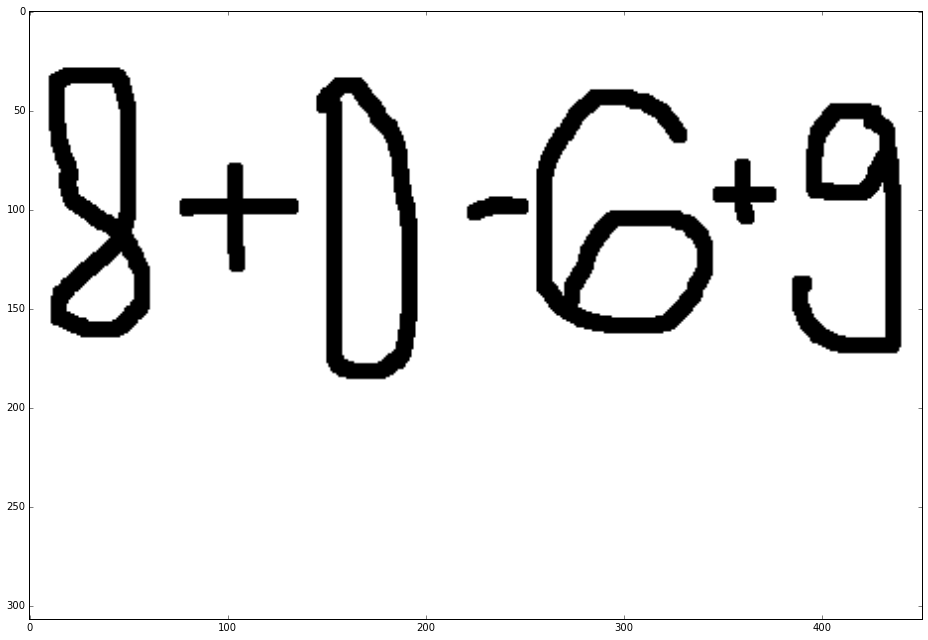

In [65]:
slika2 = load_image('images/img3.png')
display_image(slika2)
sli = image_bin_adaptive(image_gray(slika2))
selektovani_regioni, cifre = konture(slika2.copy(), sli)
brojevi = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [68]:
test_inputs = prepare_for_ann(cifre)
result = ann.predict(np.array(test_inputs, np.float32))
print display_result(result, brojevi)

['4', '8', '0', '9', '4', '6', '7']
